In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

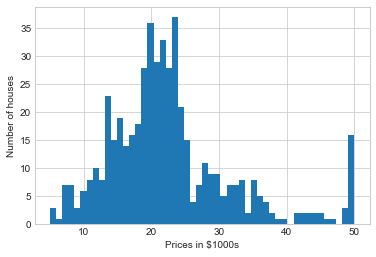

In [6]:
plt.hist(boston.target,bins=50)

plt.xlabel("Prices in $1000s")
plt.ylabel("Number of houses")

Text(0.5,0,'Number of rooms')

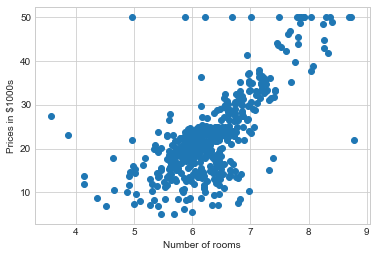

In [7]:
plt.scatter(boston.data[:,5],boston.target)
#number of rooms in dwelling
plt.ylabel("Prices in $1000s")
plt.xlabel("Number of rooms")

In [8]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


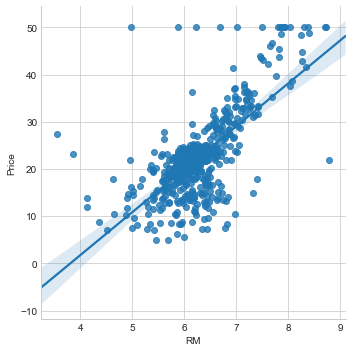

In [10]:
sns.lmplot('RM','Price',data=boston_df)  #linear fit using seaborn


In [11]:
#using numpy for a univariate linear regression

x = boston_df.RM #shape = [x]

X = np.vstack(boston_df.RM) # shape = [x 1]

Y = boston_df.Price

#for linear regression equation
# y = mx + c



In [12]:
X = np.array([ [value,1] for value in X])
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [13]:
#best fit line
m, b = np.linalg.lstsq(X,Y)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


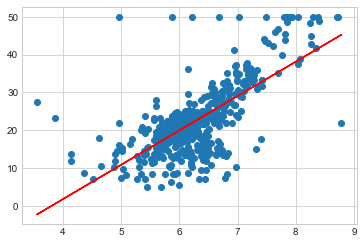

In [14]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x,m*x + b,'r',label='Best Fit Line')

In [15]:
error = np.linalg.lstsq(X,Y)[1]
error

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([22061.87919621])

In [16]:
rmse = np.sqrt(error/len(X))
print("The root mean squared error was %f" % rmse)

The root mean squared error was 6.603071


In [17]:
# Linear regression for the multivariate regression
import sklearn
from sklearn.linear_model import LinearRegression


In [18]:
lreg = LinearRegression()

In [19]:
X_multi = boston_df.drop('Price',1) # 1 for colummn

Y_target = boston_df.Price

In [20]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print("The estimated intercept coefficient is %.2f" % lreg.intercept_)
print("The number of coefficients used was %d" % len(lreg.coef_))

The estimated intercept coefficient is 36.49
The number of coefficients used was 13


In [22]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [23]:
# Using Training and Validation

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,boston_df.Price)

In [25]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(379, 2) (127, 2) (379,) (127,)


In [26]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [28]:
print('Fit a model X_train and calculate the MSE with Y_train : %.2f' % np.mean((Y_train-pred_train)**2))

Fit a model X_train and calculate the MSE with Y_train : 40.13


In [29]:
print('Fit a model X_train and calculate MSE with X_test and Y_test : %.2f' % np.mean((Y_test-pred_test)**2))

Fit a model X_train and calculate MSE with X_test and Y_test : 54.05


Text(0.5,1,'Residual Plots')

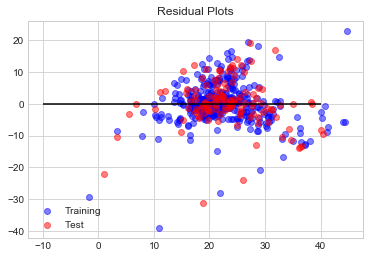

In [30]:
# Residual Plot
# residual = Observed value - Predicted value

train = plt.scatter(pred_train,(pred_train -Y_train),c = 'b',alpha = 0.5)

test = plt.scatter(pred_test, (pred_test - Y_test),c='r',alpha = 0.5)

plt.hlines(y = 0, xmin = -10, xmax = 40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')

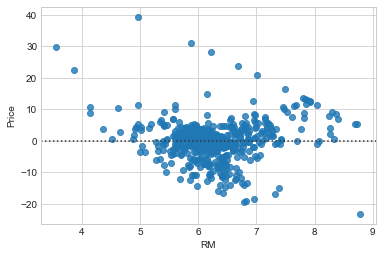

In [31]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM', 'Price', data = boston_df)
